>
# Project: wrangle and analyze data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#sources">Data sources</a></li>    
<li><a href="#gathering">Data gathering</a></li>    
<li><a href="#assessing">Data assessing</a></li>
<li><a href="#cleaning">Data cleaning</a></li>   
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction

> In this project i'll be gathering, cleaning and analyzing data obtained from the Twitter account "WeRateDogs". the data was gathered using multiple methods such as: manual download, programmatical download and over an API. After gathering, assessment of the data will be done, I'll then define the issues noticed during the assessment and clean these issues to get a cleaned master dataframe.



## DATA SOURCES

<ul>
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
<li><a href="#source">Source: Udacity</a></li>
<li><a href="#gathering">mode of gathering: Manual download</a></li> 
</ul>

<ul>
2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)
<li><a href="#source">Source: Udacity</a></li>
<li><a href="#gathering">mode of gathering: Programmatical download using Requests</a></li> 
</ul>

<ul>
3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
<li><a href="#source">Source: WeRateDogs</a></li>
<li><a href="#gathering">mode of gathering:API via Tweepy</a></li> 
</ul>

## Importing the neccessary libraries

In [1]:
import requests
import os
import tweepy
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

## GATHER

### 1. Name: WeRateDogs(twitter-archive-enhanced.csv)

This file was made available for download by udacity. It is now being loaded into a dataframe

In [2]:
df_dogs=pd.read_csv("twitter-archive-enhanced.csv")
df_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None



### 2. Name: Tweet image predictions (image_predictions.tsv)

this file will be obtained from a url using the requests library

In [3]:
#getting content from the url using request

url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
results=requests.get(url)

In [4]:
#writting the content to a file

with open("image-predictions.tsv",mode='wb') as file:
    file.write(results.content)

In [5]:
df_image_pred=pd.read_csv("image-predictions.tsv", sep='\t')
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Name: Additional data (tweet_json.txt) 

this data was gathered from the twitter API 

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'


In [7]:
auth =tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


In [8]:
api = tweepy.API(auth, wait_on_rate_limit=True)

the code for gathering this next data was gotten from the following links:
1. https://towardsdatascience.com/flattening-json-objects-in-python-f5343c794b10
2. https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/

In [9]:
api_data = []

#read the created file
with open("tweet-json.txt", "r") as f:
    for line in f:
        try: 
            tweet = json.loads(line)
            #append a dictionary to the created list            
            api_data.append({
                "tweet_id": tweet["id"],
                "retweet_count": tweet["retweet_count"],
                "favorite_count": tweet["favorite_count"],
                "retweeted": tweet["retweeted"],
                "display_text_range": tweet["display_text_range"]})             
        except:
            print("Error.") 
            
df_api = pd.DataFrame(api_data, columns = ["tweet_id", "retweet_count", "favorite_count", "retweeted", "display_text_range"])
df_api.head()

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,8853,39467,False,"[0, 85]"
1,892177421306343426,6514,33819,False,"[0, 138]"
2,891815181378084864,4328,25461,False,"[0, 121]"
3,891689557279858688,8964,42908,False,"[0, 79]"
4,891327558926688256,9774,41048,False,"[0, 138]"


## ASSESSING

checking for tidiness and quality issues

### 1. Name: WeRateDogs(twitter-archive-enhanced.csv)

In [10]:
df_dogs.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
507,812709060537683968,NaN,NaN,2016-12-24 17:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brandi and Harley. They are practicing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812709060...,12,10,Brandi,None,None,None,None
1453,695629776980148225,NaN,NaN,2016-02-05 15:27:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Calvin. He's proof that degrees mean abso...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695629776...,8,10,Calvin,None,None,None,None
1074,739844404073074688,NaN,NaN,2016-06-06 15:40:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Simba. He's the grand prize. The troph...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739844404...,12,10,Simba,None,None,None,None
1139,728015554473250816,NaN,NaN,2016-05-05 00:16:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rueben. He has reached ultimate pupper...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728015554...,11,10,Rueben,None,None,pupper,None
304,836380477523124226,NaN,NaN,2017-02-28 01:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ava. She just blasted off. Streamline ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836380477...,12,10,Ava,None,None,pupper,None


after visually assessing the dataset some of  the issues with the dataset are:

1. some of the columns such as name ,doggo, floofer, pupper contains a 'NONE' value

In [11]:
df_dogs.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

we can see that some of the columns should have wrong datatype such as:

1. the tweet id should be a string datatype

2. the timestamp column should be a datetime datatype

In [12]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

the following columns contain a lot pf missing data: 

in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp columns

In [13]:
#lets check for duplicated rows 

df_dogs.duplicated().sum()

0

there are no duplicate rows in the dataset

now lets check for the 'None values contained in some of  the columns 

In [14]:
df_dogs.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

there are significant 'None' values which is a wrong name

there is also some 'a' values which also seems like a wrong name

In [15]:
#creating a copy of the dataframe to perform further assessment

df_dogs_ass = df_dogs.copy()

In [16]:
#checking to see count of doggo column are 'None' values

df_dogs_ass["doggo"].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [17]:
#checking to see count of floofer column are 'None' values

df_dogs_ass["floofer"].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [18]:
#checking to see count of pupper values are 'None' values

df_dogs_ass["pupper"].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [19]:
#checking to see count of pupper values are 'None' values

df_dogs_ass["puppo"].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

the pupper, doggo,  pupper columns have a chunk of thier values 'None'

In [20]:
### 2. Name: Tweet image predictions (image_predictions.tsv)

In [21]:
df_image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
258,670780561024270336,https://pbs.twimg.com/media/CU8XW2dWwAA-Lmc.jpg,1,Labrador_retriever,0.244889,True,American_black_bear,0.056993,False,brown_bear,0.053993,False
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
637,681261549936340994,https://pbs.twimg.com/media/CXRTw_5WMAAUDVp.jpg,1,Tibetan_terrier,0.382101,True,miniature_poodle,0.095429,True,Maltese_dog,0.065738,True
1977,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,golden_retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_retriever,0.032621,True
726,686358356425093120,https://pbs.twimg.com/media/CYZvRttWYAE_RXc.jpg,1,pug,0.985237,True,bull_mastiff,0.008841,True,boxer,0.002321,True


after visually assessing the dataset, some the issues with the dataset are:

1. some of the predictions are in lowercase while some in uppercase

2. there are underscores between some of the words instead of space  

In [22]:
#checking for wrong datatypes

df_image_pred.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

the tweet_id column should be a string

In [23]:
#getting an overview of the dataset

df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


there are no missing values in the dataset

In [24]:
#checking for duplicated rows
#more than 1 image cants have same url so we will check for duplicate urls

df_image_pred.jpg_url.duplicated().sum()

66

there are duplicate urls 

In [25]:
#checking for retweets

df_image_pred.jpg_url.value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

lots of urls came up twice so retweets data are present

In [26]:
df_image_pred.tweet_id.duplicated().sum()

0

the duplicate urls have different tweet id

In [27]:
### 3. Name: Additional data (tweet_json.txt) 

In [28]:
df_api.sample(5)

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
1427,697596423848730625,1425,3306,False,"[0, 117]"
1216,714957620017307648,1595,4503,False,"[0, 140]"
1296,707741517457260545,696,2718,False,"[0, 140]"
392,825876512159186944,2146,11525,False,"[0, 106]"
101,872620804844003328,3911,21309,False,"[0, 116]"


In [29]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2354 non-null   int64 
 1   retweet_count       2354 non-null   int64 
 2   favorite_count      2354 non-null   int64 
 3   retweeted           2354 non-null   bool  
 4   display_text_range  2354 non-null   object
dtypes: bool(1), int64(3), object(1)
memory usage: 76.0+ KB


the tweet_id needs to be changed to string

#### Quality
##### `df_dogs` table
- the id column should be a string datatype
- the timestamp column should be a datetime datatype
- some of the dog names are not correct (None, an)
- it contains retweets

##### `df_image_pred` table
- the id column should be a string datatype
- contains retweets (there are duplicate urls)
- there are empty rows in the jpg_url column
- there are underscores instead of whitespaces

##### `df_api` table
- the id column should be a string datatype

#### Tidiness
##### `df_dogs` table
the columns `doggo`, `floofer`,`pupper` and `puppo` columns should be combined into 1

some of the columns are irrelevant
##### `df_api` table
- display_text_range has 2 variables
- the dog predictions should be made into one column

## Clean

In [30]:
df_dogs_clean=df_dogs.copy()
df_image_pred_clean=df_image_pred.copy()
df_image_pred_clean=df_image_pred.copy()

##### Define


creating a master dataset to tidy up, there are no missing data in tweet_id column
so that should be the legth of the new dtaframe

##### Code

In [31]:

df_master = pd.merge(df_dogs, df_api, on = "tweet_id", how = "outer")

In [32]:
df_master = pd.merge(df_master, df_image_pred, on = "tweet_id", how = "outer")

##### Test

In [33]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [34]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [35]:
#creating a copy of the master dataset

df_master_cleaned = df_master.copy()

#df_image_pred and df_dogs: contains retweets

##### Define

we want rows wihout retweeted_id data 

we also want rows without reply_id data

##### Code

In [36]:
filt=df_master_cleaned["retweeted_status_id"].isnull()

In [37]:
df_master_cleaned = df_master_cleaned[filt]

In [38]:
filt1=df_master_cleaned["in_reply_to_status_id"].isnull()

In [39]:
df_master_cleaned = df_master_cleaned[filt1]

##### Test

In [40]:
df_master_cleaned.retweeted.value_counts()

False    2097
Name: retweeted, dtype: int64

#df_image_pred and df_dogs: contains some irrelevant columns

##### Define

we will be using the dropping the columns not needed for analysis

##### Code

In [41]:
df_master_cleaned.drop(["retweeted_status_timestamp", "retweeted","in_reply_to_status_id", "in_reply_to_user_id",
                      "retweeted_status_id", "retweeted_status_user_id", 
                      ], inplace=True, axis = 1)

##### Test

In [42]:
df_master_cleaned.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'retweet_count', 'favorite_count',
       'display_text_range', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

##df_image_pred: there are empty rows in the jpg_url column

##### Define

the jpg_urls with NAN are the ones without an image

##### Code

In [43]:
df_master_cleaned.jpg_url.isnull().sum()

126

In [44]:
df_master_cleaned.dropna(subset = ["jpg_url"], inplace = True)

##### Test

In [45]:
df_master_cleaned.jpg_url.isnull().sum()

0

##Clean the datatypes of the columns

##### Define

convert the integer datatype to string

convert the timestamp to datetime

##### Code

In [46]:
df_master_cleaned["tweet_id"] = df_master_cleaned["tweet_id"].astype("str")

In [47]:
df_master_cleaned["timestamp"] = pd.to_datetime(df_master_cleaned.timestamp)

##### Test

In [48]:
df_master_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   doggo               1971 non-null   object             
 9   floofer             1971 non-null   object             
 10  pupper              1971 non-null   object             
 11  puppo               1971 non-null   object             
 12  retweet_count       1971 non-null 

#df_api: display_text_range has 2 variables

##### Define

split the text_range into two using a list function

##### Code

In [49]:
#accessing the lower text range

df_master_cleaned["lower_range"] = df_master_cleaned["display_text_range"].apply(lambda x: x[0])

In [50]:
#accessing the upper text range

df_master_cleaned["upper_range"] = df_master_cleaned["display_text_range"].apply(lambda x: x[1])

In [51]:
#dropping the joint column

df_master_cleaned.drop("display_text_range", axis = 1, inplace = True)

##### Test

In [52]:
df_master_cleaned[["lower_range", "upper_range"]].head()

,lower_range,upper_range
0,0,85
1,0,138
2,0,121
3,0,79
4,0,138


df_dogs:Remove the wrong names of name column

##### Define

replace the wrong names with nan values

##### Code

In [53]:
for name in ["None", "a", "by", "the"]:
    df_master_cleaned["name"].replace(name, np.nan, inplace = True)

##### Test

In [54]:
df_master_cleaned['name'].value_counts()

Charlie       11
Oliver        10
Cooper        10
Lucy          10
Tucker         9
              ..
Shelby         1
Sephie         1
Bonaparte      1
Wishes         1
Christoper     1
Name: name, Length: 931, dtype: int64

##there are underscores instead of whitespaces 

##### Define

replace the underscores with whitespaces


##### Code

In [55]:
df_master_cleaned.p1 = df_master_cleaned.p1.str.replace("_", " ")
df_master_cleaned.p2 = df_master_cleaned.p2.str.replace("_", " ")
df_master_cleaned.p3 = df_master_cleaned.p3.str.replace("_", " ")

##### Test

In [56]:
df_master_cleaned[['p1','p2','p3']].head()

,p1,p2,p3
0,orange,bagel,banana
1,Chihuahua,Pekinese,papillon
2,Chihuahua,malamute,kelpie
3,paper towel,Labrador retriever,spatula
4,basset,English springer,German short-haired pointer


##the columns `doggo`, `floofer`,`pupper` and `puppo` columns should be combined into 1

##### Define

replace the None values of doggo, floofer, pupper, puppo with nan values and concatenate the columns

In [57]:
##### Code

In [58]:
for x in ["doggo", "floofer", "pupper", "puppo"]:
    df_master_cleaned[x].replace("None", '', inplace = True)

In [59]:
df_master_cleaned['dog_type'] = df_master_cleaned['doggo'].map(str) + df_master_cleaned[
    'floofer'].map(str) + df_master_cleaned['pupper'].map(str) + df_master_cleaned['puppo'].map(str)

In [60]:
#replacing the empty rows with np.nan
df_master_cleaned["dog_type"].replace("", np.nan, inplace = True)

##### Test

In [61]:
df_master_cleaned['dog_type'].value_counts()

pupper          201
doggo            63
puppo            22
doggopupper       8
floofer           7
doggopuppo        1
doggofloofer      1
Name: dog_type, dtype: int64

##### Define

extract the most likely prediction 

concatenate the p1 , p2 and p3 columns into 1 and drop the individual columns

##### Code

In [62]:
#creating a function to get the most likely dog prediction

def get_likely(p):
    if p[0] == True:
        return p[1]
    elif p[2] == True:
        return p[3]
    else:
        return p[4]

In [63]:
#creating the dog breed column by applying the get_likely function

df_master_cleaned["dog_breed"] = df_master_cleaned[["p1_dog", "p1", "p2_dog", "p2", "p3"]].apply(get_likely, axis = 1)

In [64]:
#dropping the redundant columns

df_master_cleaned.drop(["p1" ,"p1_dog", "p2", "p2_dog", "p3", "p3_dog"], inplace = True, axis = 1)

##### Test

In [65]:
df_master_cleaned.dog_breed.value_counts()

golden retriever      156
Labrador retriever    106
Pembroke               94
Chihuahua              90
pug                    62
                     ... 
cab                     1
padlock                 1
cup                     1
neck brace              1
terrapin                1
Name: dog_breed, Length: 338, dtype: int64

In [66]:
#save the data to a csv file
df_master_cleaned.to_csv('twitter_archive_master.csv', index = False)

## Data Analysis

**Questions to be posed:**

<ol>
    <li>what month of the year had the most had the most tweets?</li>
    <li>what dog breed has the most activity?</li> 
    <li>is there a relationship between retweets and favorites?</li> 
</ol>
    

In [67]:
#loading the dataset

df = pd.read_csv("twitter_archive_master.csv")
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,favorite_count,jpg_url,img_num,p1_conf,p2_conf,p3_conf,lower_range,upper_range,dog_type,dog_breed
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,...,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,0.097049,0.085851,0.076110,0,85,NaN,banana
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,...,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,0.323581,0.090647,0.068957,0,138,NaN,Chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,...,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,0.716012,0.078253,0.031379,0,121,NaN,Chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,...,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,0.170278,0.168086,0.040836,0,79,NaN,Labrador retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,...,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,0.555712,0.225770,0.175219,0,138,NaN,basset


### 1.what month of the year had the most had the most tweets?


In [68]:
#creating a copy of the dataset
df_period=df.copy()

In [69]:
#checking the data type of the columns

df.dtypes

tweet_id                int64
timestamp              object
source                 object
text                   object
expanded_urls          object
rating_numerator        int64
rating_denominator      int64
name                   object
doggo                  object
floofer                object
pupper                 object
puppo                  object
retweet_count         float64
favorite_count        float64
jpg_url                object
img_num               float64
p1_conf               float64
p2_conf               float64
p3_conf               float64
lower_range             int64
upper_range             int64
dog_type               object
dog_breed              object
dtype: object

the timestamp column is in an object form and should be converted to datetime data type

In [70]:
#converting the timestamp column to  datetime 

df_period['timestamp']=pd.to_datetime(df_period['timestamp'])

In [71]:
#extracting the month of the year

df_period['month_year']=df_period["timestamp"].dt.to_period('M')

C:\Users\qoyyum\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [72]:
df_period['month_year']

0       2017-08
1       2017-08
2       2017-07
3       2017-07
4       2017-07
         ...   
1966    2015-11
1967    2015-11
1968    2015-11
1969    2015-11
1970    2015-11
Name: month_year, Length: 1971, dtype: period[M]

In [73]:
#sorting the dataset by month of the year

df_period_by_month = df_period.sort_values("month_year")

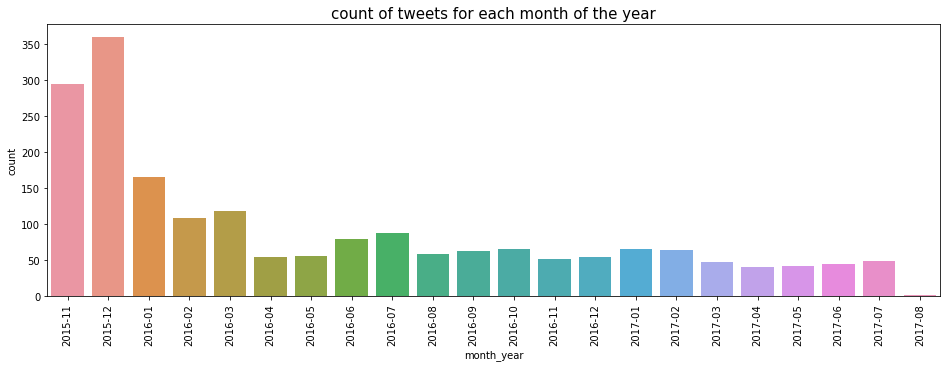

In [74]:
# making a counplot of the month of the year
plt.figure(figsize=(16,5))
sns.countplot(x='month_year', data=df_period_by_month)
plt.xticks(rotation=90)
plt.title('count of tweets for each month of the year', fontsize=15);

december of 2015 generated the most tweets

the number of tweets generated declined as the year went on

### 2. what dog breed has the most activity?

In [75]:
#creating a copy of the dataset

df_breed=df.copy()

activity is determined by sum of retweets and favorites

In [76]:
#grouping the dataset by dog_breed

df_activity=df_breed[["retweet_count", "favorite_count", "dog_breed"]].groupby("dog_breed",as_index = False)

In [77]:
#getting the sum
df_activity=df_activity.sum()

In [78]:
#getting the sum of retweets and favorites 

df_activity["sum"] = df_activity["retweet_count"] + df_activity["favorite_count"]

In [79]:
#sorting the dataset by sum

df_activity_by_sum=df_activity.sort_values("sum",ascending = False)

Text(0, 0.5, 'activity')

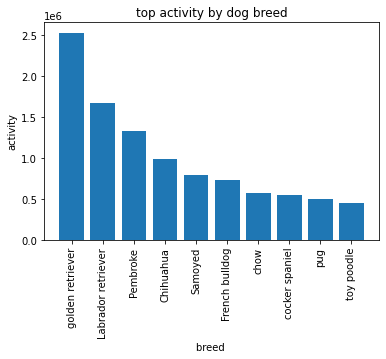

In [80]:
locations =df_activity_by_sum['dog_breed'].iloc[:10]
heights = df_activity_by_sum['sum'].iloc[:10]

plt.bar(locations, heights)
plt.title('top activity by dog breed')
plt.xticks(rotation=90)
plt.xlabel('breed ')
plt.ylabel('activity')

the golden retriever is the dog with the most activity

### 3. is there a relationship between retweets and favorites?

In [81]:
#creating a copy of the dataset

df_rel=df.copy()

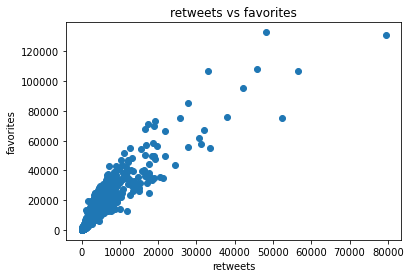

In [82]:
#creating a scatter plot of retweets vs favorites

plt.scatter(x=df_rel["retweet_count"], y=df_rel["favorite_count"]);
plt.title('retweets vs favorites')
plt.xlabel('retweets')
plt.ylabel('favorites')
plt.show()

Text(0.5, 1.0, 'retweets vs favorites')

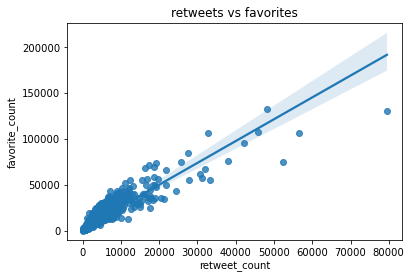

In [83]:
sns.regplot(x='retweet_count',y='favorite_count',data=df_rel)
plt.title('retweets vs favorites')

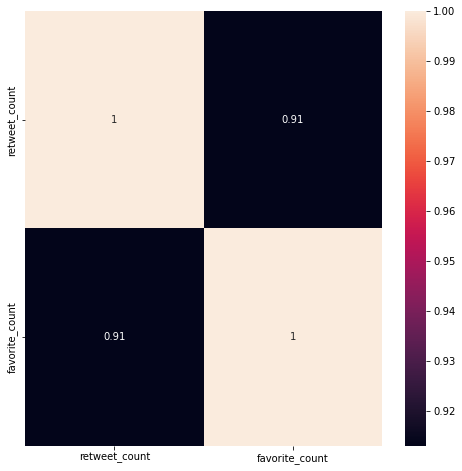

In [84]:
#creating a heatmap to view the correlation

corr_matrix=df_rel[['retweet_count','favorite_count']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

there is a very high positive correlation between both columns

<a id='conclusions'></a>
## Conclusions

1. we can see that there is an overall downtrend in the amount of tweets made monthly

2. the golden retriever is the breed with most actvivty

3. the higher the retweets, the higher the favorite count
